In [1]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 모델 튜닝 - 하이퍼파라미터 튜닝

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=.2, random_state=42)

In [3]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', random_state=42)  # loss = 손실함수 (로지스틱, 힌지(svm?))
sgd.fit(X_train, y_train)   # model = sgd.fit(X_train, y_train)  // 앞에 변수 안쓰면 sgd로 반환
sgd.score(X_test, y_test)   # 정확도

0.8333333333333334

In [4]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', random_state=42)  # 결정경계- 데이터와 어느정도 먼 거리에 있는지,, - 데이터와 경계 사이에 마진 최소화시키기
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

0.9385964912280702

### 검증세트 활용

In [5]:
cancer = load_breast_cancer()

X_train_all, X_test, y_train_all, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(    # val = validation 검증
    X_train_all, y_train_all, stratify=y_train_all, test_size=.2, random_state=42)

In [6]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

0.6929824561403509

In [7]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# k-Fold : k 분할개수 - cv(디폴트:5개분할)
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

logistic = LogisticRegression(random_state=42)
sgd = SGDClassifier(loss='log', random_state=42)

scores = cross_val_score(logistic, X, y)
scores

array([0.92982456, 0.93859649, 0.95614035, 0.92105263, 0.95575221])

In [8]:
print('교차검증 평균점수 : {:.2f}'.format(scores.mean()))

교차검증 평균점수 : 0.94


In [9]:
# 다중평가지표 : cross_validate(), 매 분할마다 훈련과 테스트에 걸린 시간과
# 설정에 따라 훈련데이터와 테스트데이터의 점수를 얻을 수 있다
from sklearn.model_selection import cross_validate
res = cross_validate(logistic, X, y, return_train_score=True)
res

{'fit_time': array([0.03599763, 0.03299975, 0.03599977, 0.03400016, 0.03400087]),
 'score_time': array([0.00099945, 0.00100017, 0.00100088, 0.        , 0.        ]),
 'test_score': array([0.92982456, 0.93859649, 0.95614035, 0.92105263, 0.95575221]),
 'train_score': array([0.95164835, 0.94505495, 0.94505495, 0.95164835, 0.94736842])}

In [10]:
import pandas as pd
res_df = pd.DataFrame(res)
res_df

,fit_time,score_time,test_score,train_score
0,0.035998,0.000999,0.929825,0.951648
1,0.033000,0.001000,0.938596,0.945055
2,0.036000,0.001001,0.956140,0.945055
3,0.034000,0.000000,0.921053,0.951648
4,0.034001,0.000000,0.955752,0.947368


In [11]:
import pandas as pd
import mglearn
res_df = pd.DataFrame(res)
display(res_df)
print('평균 시간과 점수 : \n', res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.035998,0.000999,0.929825,0.951648
1,0.033000,0.001000,0.938596,0.945055
2,0.036000,0.001001,0.956140,0.945055
3,0.034000,0.000000,0.921053,0.951648
4,0.034001,0.000000,0.955752,0.947368


평균 시간과 점수 : 
 fit_time       0.034600
score_time     0.000600
test_score     0.940273
train_score    0.948155
dtype: float64


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
scores = cross_val_score(logistic, X, y, cv=3)  # 3개로 분할
scores

array([0.93157895, 0.96842105, 0.93121693])

In [14]:
print('교차검증 평균점수 : {:.2f}'.format(scores.mean()))

교차검증 평균점수 : 0.94


### 일반화, 과대적합, 과소적합

In [15]:
# 시각화 한글처리
import matplotlib as mpl

# 폰트 설정
# mpl.rc('font', family='Malgun Gothic')
mpl.rc('font', family = 'NanumGothic')

# 유니코드에서 음수 부호설정
mpl.rc('axes', unicode_minus=False)

X.shape : (26, 2)


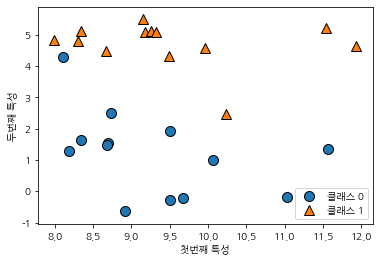

In [16]:
X, y = mglearn.datasets.make_forge()        # 포지데이터 가져옴

# 산점도 그래프
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['클래스 0', '클래스 1'], loc=4)
plt.xlabel('첫번째 특성')
plt.ylabel('두번째 특성')
print('X.shape : {}'.format(X.shape))

### Knn(k-최근접 이웃)
- 가장 간단한 머신러닝 알고리즘
- 훈련데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부이다.
- 훈련 데이터 샘플 하나를 최근접 이웃으로 찾아 예측에 사용한다.

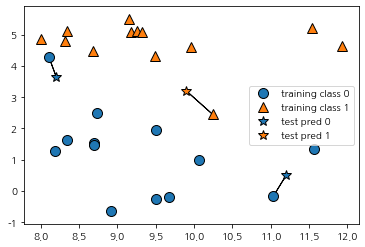

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=1)  # k=이웃의 수, n_neighbors=1 이웃의 수를 담는 매개변수

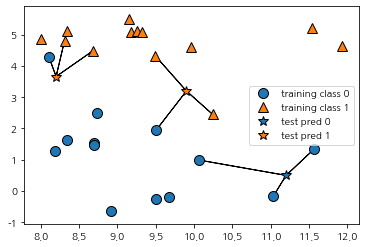

In [18]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [19]:
# train과 test 데이터로 분할
# X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [21]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
print('테스트 데이터 예측 : {}'.format(clf.predict(X_test)))

테스트 데이터 예측 : [1 0 1 0 1 0 0]


In [23]:
print('테스트 데이터 정확도 : {:.2f}'.format(clf.score(X_test,y_test)))

테스트 데이터 정확도 : 0.86


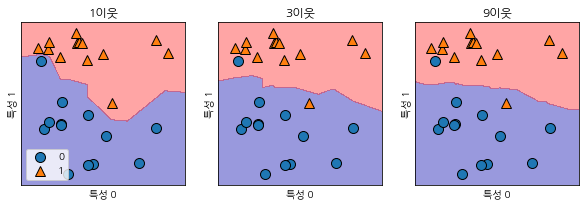

In [24]:
# 결정 경계(decision boundary) : 각각의 클래스로 지정한 영역을 나누는 경계
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# 이웃의 수 1, 3, 9
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title('{}이웃'.format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc=3)

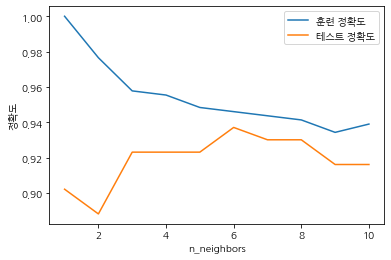

In [25]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_setting = range(1, 11)
for n_neighbors in neighbors_setting:
    # 모델생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 데이터 정확도
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_setting, training_accuracy, label='훈련 정확도')
plt.plot(neighbors_setting, test_accuracy, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel("n_neighbors")
plt.legend()

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.0.0'

### 난수 생성

In [28]:
# 균일분포(uniform) : 최솟값과 최댓값 사이의 모든 수가 나올 확률이 동일
# 정규분포(normal) : 평균과 표준편차를 이용
rand = tf.random.uniform([1], 0, 1)  # 차원(shape), 최솟값, 최댓값
rand

<tf.Tensor: id=6, shape=(1,), dtype=float32, numpy=array([0.10580659], dtype=float32)>

In [29]:
rand = tf.random.normal([1], 0, 1)  # 차원, 평균, 표준편차
rand

<tf.Tensor: id=12, shape=(1,), dtype=float32, numpy=array([-0.01418523], dtype=float32)>

In [30]:
rand = tf.random.uniform([4], 0, 1)  # 1차원의 4개의 값
rand

<tf.Tensor: id=19, shape=(4,), dtype=float32, numpy=array([0.6586882 , 0.23998117, 0.31762028, 0.09322178], dtype=float32)>

In [31]:
rand = tf.random.normal([4], 0, 1)
rand

<tf.Tensor: id=25, shape=(4,), dtype=float32, numpy=array([-1.1342528 , -1.17319   , -1.2675478 , -0.03786448], dtype=float32)>

### 뉴런 - 로지스틱 회귀모형

In [32]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [33]:
# y = ax+b
x = 1
y = 0
w = tf.random.normal([1], 0, 1)  # shape, 평균, 표준편차
output = sigmoid(x*w)
output

0.572503119600093

In [34]:
# 경사하강법 : w(가중치)에 입력과 학습률과 에러를 곱한 값을 더해주는 것
# 학습률을 이용하여 w를 업데이트한다.  # 일반적으로 학습률은 0.1을 사용
for i in range(1000):
    output = sigmoid(x*w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 -0.10729519122423897 0.10729519122423897
199 -0.053748425087551156 0.053748425087551156
299 -0.03547196402157119 0.03547196402157119
399 -0.02638468004356649 0.02638468004356649
499 -0.020974348237268983 0.020974348237268983
599 -0.01739259857800733 0.01739259857800733
699 -0.014849391217578358 0.014849391217578358
799 -0.012951488161745852 0.012951488161745852
899 -0.01148168118497163 0.01148168118497163
999 -0.01031014895245798 0.01031014895245798


In [35]:
# 만약, 입력값이 0이 들어오고, 출력으로 1을 얻는 신경망을 생성한다면?
x = 0
y = 1
w = tf.random.normal([1], 0, 1)

for i in range(1000):
    output = sigmoid(x*w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


In [36]:
# 만약, 입력값이 0이 들어오고, 출력으로 1을 얻는 신경망을 생성한다면?
# 편향(bias) = 절편. 보편적으로 1을 사용
x = 0
y = 1
w = tf.random.normal([1], 0, 1)
b = tf.random.normal([1], 0, 1)

for i in range(1000):
    output = sigmoid(x*w + b)
    error = y - output
    w = w + x * 0.1 * error
    b = b + 1 * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.11338254960176919 0.8866174503982308
199 0.055325927342482206 0.9446740726575178
299 0.03616535689785483 0.9638346431021452
399 0.02676998369722361 0.9732300163027764
499 0.021218450960312274 0.9787815490396877
599 0.0175606861015154 0.9824393138984846
699 0.014972015916552617 0.9850279840834474
799 0.013044895227031561 0.9869551047729684
899 0.011555159011630622 0.9884448409883694
999 0.01036942392713347 0.9896305760728665


### k-NN 최근접 이웃 알고리즘의 회귀문제

Text(0, 0.5, '타겟')

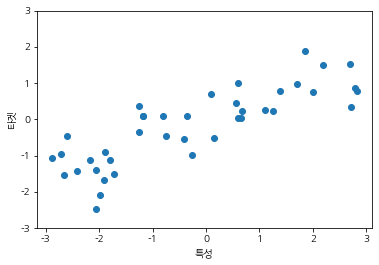

In [37]:
X, y = mglearn.datasets.make_wave(n_samples=40)   # wave dataset 가져옴  # 56쪽=페이지번호42
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('특성')
plt.ylabel('타겟')

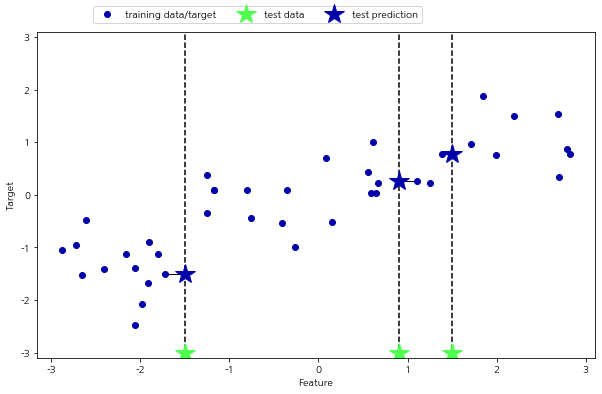

In [38]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

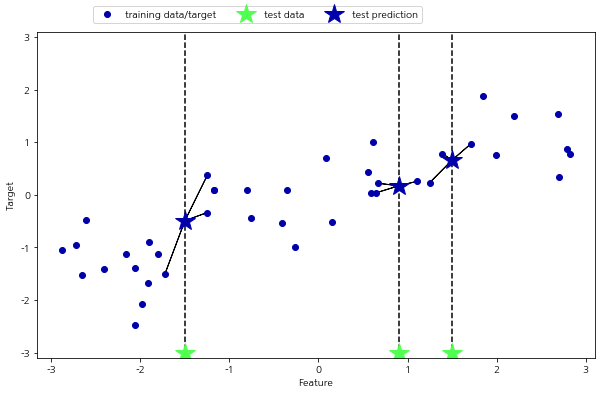

In [39]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [40]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [41]:
print("테스트 세트 예측 :\n", reg.predict(X_test))

테스트 세트 예측 :
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [43]:
# R2 (결정계수) = 설명계수
# R2 = 1 - (타깃-예측)² 의 합 / (타깃-평균)² 의 합
print('테스트 세트 R2 : {:.2f}'.format(reg.score(X_test, y_test)))

테스트 세트 R2 : 0.83


### 선형모델

w[0]: 0.393906  b: -0.031804


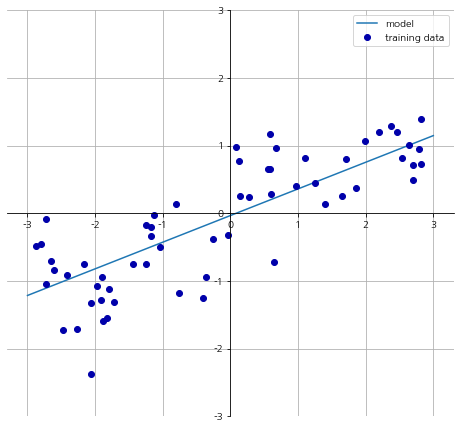

In [44]:
mglearn.plots.plot_linear_regression_wave()  # model - 예측데이터

In [45]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [46]:
# fit가 반환해주는 값
## 기울기(w) 가중치(weight) 계수(coefficient) : lr.coef_  # 가중치는 특성마다 다름 / 특성 수만큼 나옴
## 편향(bias, offset), 절편(intercept) : lr.intercept_
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [47]:
print("훈련 데이터의 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터의 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 데이터의 점수 : 0.67
테스트 데이터의 점수: 0.66


- R2값이 0.66이면 좋은 결과가 아니다.
- 훈련 세트와 테스트 세트의 점수가 매우 비슷하다. 이건 과대적합이 아니라 과소적합인 상태를 의미한다.
- 특성이 적은 선형 모델은 과대적합을 걱정할 필요는 없다. 단, 특성이 많은 데이터셋에서 선형 모델의 성능이 매우 높아져서 과대적합이 될 가능성이 높다.

In [48]:
# 보스턴 주택가격 데이터셋, 1970년대 주택 평균 가격을 예측한 것이다
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape : {}".format(boston.data.shape))

Data shape: (506, 13)


In [49]:
# 특성 공학 : Feature Engineering
# 특성을 유도해내는 것을 말한다
X, y = mglearn.datasets.load_extended_boston()
print("X.shape : {}".format(X.shape))

X.shape: (506, 104)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [51]:
print("훈련 데이터의 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터의 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 데이터의 점수 : 0.95
테스트 데이터의 점수: 0.61


- 훈련 데이터와 테스트 데이터의 성능 차이는 모델이 과대적합 되었다는 확실한 신호이다. 따라서 복잡도를 제어할 수 있는 모델을 사용해야 한다.
- 릿지 회귀(L2규제-패널티, 평균제곱오차)와 라쏘 회귀(L1규제-패널티, 기울기의 절댓값)  
  Ridge regression, Lasso regression
  (복잡도, 특성 등 영향 주는 것을 최소화 해서 기울기(가중치)를 작게 만들기위해 규제를 사용)

In [52]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [53]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [55]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


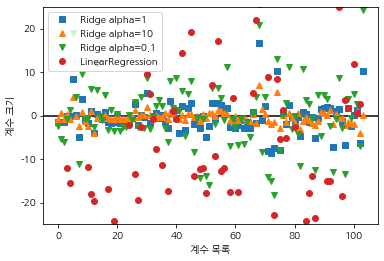

In [58]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

xlims = plt.xlim()                 # x의 limit
plt.hlines(0, xlims[0], xlims[1])  # plt.hlines(0, 0, len(lr.coef_))
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

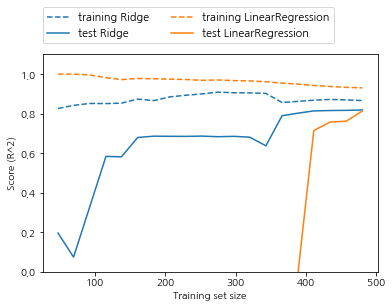

In [59]:
# 학습곡선(learning curve) : 훈련과정을 여러번 반복하면서 학습한 알고리즘에서 
#                            반복횟수에 따른 성능변화를 보여주는 그래프
mglearn.plots.plot_ridge_n_samples()

In [60]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수 : {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


- 훈련데이터와 테스트데이터 모두 결과가 좋지 않다.
- 이것은 과소적합이며 104개의 특성 중 4개만 사용한 것이다.
- Lasso도 계수를 얼마나 강하게 0으로 보낼 지를 조절하는 alpha 매개변수
- Lasso는 L1, L2 규제를 함께 쓰는 엘라스틱넷 방식에서 L2 규제가 빠진 것이며 Lasso의 alpha 매개변수 R은 엘라스틱넷 패키지인 glmnet의 lambda 매개변수와 같은 의미

In [61]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련데이터 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수 : {}".format(np.sum(lasso001.coef_ != 0)))

훈련데이터 점수 : 0.90
테스트 데이터 점수 : 0.77
사용한 특성의 개수 : 33


In [65]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련데이터 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수 : {}".format(np.sum(lasso00001.coef_ != 0)))

훈련데이터 점수 : 0.95
테스트 데이터 점수 : 0.64
사용한 특성의 개수 : 96


Text(0, 0.5, '계수 크기')

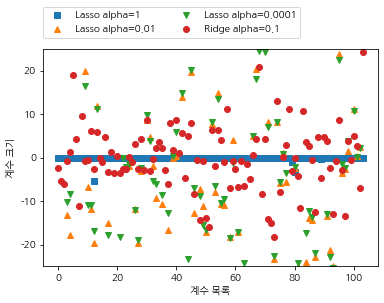

In [64]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

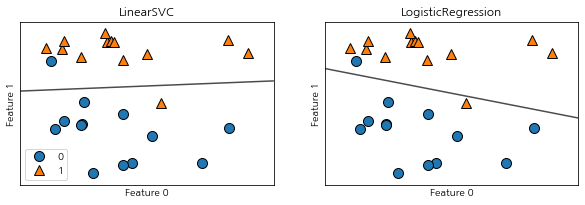

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC  # support vector machine

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

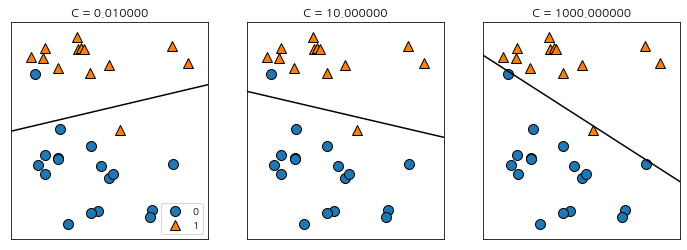

In [68]:
mglearn.plots.plot_linear_svc_regularization()

- 왼쪽에 C값이 가장 낮다 (데이터 포인트 중 다수에 맞추려고 한다.)
- C값이 작으면 규제가 많이 적용되어 있는 것이다. 그래서 경계선이 수평에 가깝다

- 중간 그림은 C값이 왼쪽보다 조금 크다. 잘못 분류된 두 샘플에 민감해져, 결정경계가 약간 기울어졌다.

- 오른쪽의 그림은 C값이 가장 크다. (각각의 데이터 샘플에 정확히 분류하려는 노력을 한다.) 클래스1(▲)은 완벽히 분류했지만, 여전히 잘못 분류된 샘플이 있다.
- 두 클래스의 결정경계선이 두 클래스의 면적 차이가 많다.(과대적합 된 것 같다)

In [69]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 데이터 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


In [98]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.944
Test set score: 0.958


In [99]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


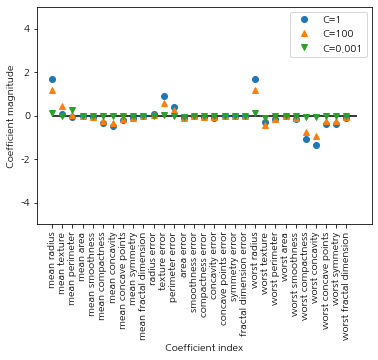

In [100]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

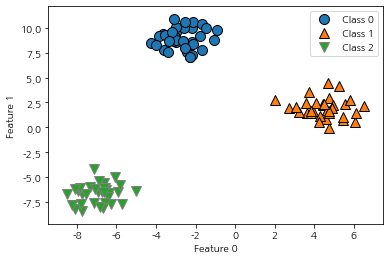

In [101]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [102]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


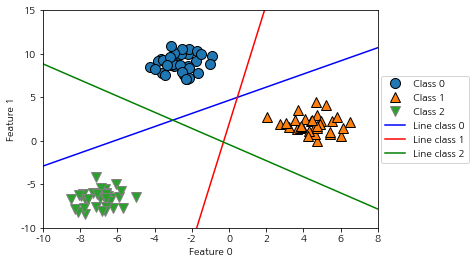

In [103]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(
    linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 
            'Line class 1','Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

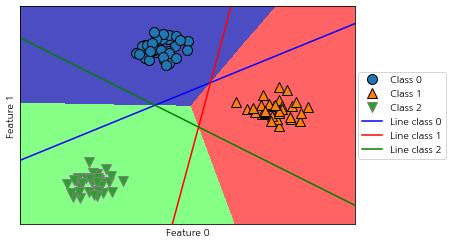

In [104]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(
    linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2',
            'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [105]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])

y = np.array([0, 1, 0, 1])

In [106]:
counts = {}
for label in np.unique(y):   # [0, 1]
    # 특성마다 1을 카운트 함
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts :\n{}".format(counts))

Feature counts :
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}
